In [1]:
import numpy as np 
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import re

In [2]:
filename= glob.glob('/Users/reza/Desktop/NRC_project/data/combustion_instability_timeseriesData/HydrogenData/*.*')


In [3]:
len(filename)

96

# 1. Data preprocessing

In [4]:
names=['Frequency','RMS DP3 pressure','RMS PMT']
y_data=pd.read_excel('/Users/reza/Desktop/NRC_project/data/combustion_instability_timeseriesData/HydrogenData/open_30kW_600slpm_60_.xlsx',header=None,names=names)
Y_data=y_data.drop('Frequency', axis=1)
#Y_data.drop([0],axis=0, inplace=True)
Y_data

,RMS DP3 pressure,RMS PMT
0,-0.003022,-0.018100
1,-0.013054,-0.020130
2,-0.017345,-0.019256
3,-0.006685,-0.020766
4,-0.000895,-0.019672
...,...,...
119995,0.014653,-0.010239
119996,0.010411,-0.012349
119997,0.012234,-0.011615
119998,0.012167,-0.011510


In [6]:
names=['Frequency','RMS DP3 pressure','RMS PMT']
for i in range (len(filename)-2):

    y_data=pd.read_excel(filename[i],header=None,names=names)
    Y_data=y_data.drop('Frequency', axis=1)
    splittedDirectorty=filename[i].split("/")
    splittedDirectorty[-1]
    splittedFilename=splittedDirectorty[-1].split('_')
    one_data=[]

    if splittedFilename[0]=='open':
        one_data.extend([1])
    if splittedFilename[0]=='closed' or splittedFilename[0]=='closed2' :
            one_data.extend([0])
    sep= re.compile("([0-9]+)([a-zA-Z]+)") 

    heat=sep.match(splittedFilename[1])
    one_data.append(int(heat.group(1)))
    air=sep.match(splittedFilename[2])
    one_data.append(int(air.group(1)))
    one_data.append(int(splittedFilename[3]))
    print(one_data)
    oneRowData=[one_data]
    x_data= pd.DataFrame(oneRowData,columns=['open/closed','Heat','H2','Airflow'])
    X_data=pd.DataFrame(np.repeat(x_data.values,len(Y_data),axis=0),columns=x_data.columns)
#time=[i/2 for i in range(0, len(Y_data))]
#X_data.insert(0,'time',time)
    xx_data=pd.concat([X_data,Y_data],axis=1)
    xx_data.drop([119999],axis=0,inplace=True)
    
    yy_data=Y_data.drop([0],axis=0,inplace=False)
    
    if i==0:
        total_x_data=xx_data
        total_y_data=yy_data
    if i!=0:
        total_x_data=pd.concat([total_x_data,xx_data],axis=0)
        total_y_data=pd.concat([total_y_data,yy_data])

[1, 30, 400, 10]
[1, 20, 500, 30]
[1, 25, 600, 30]
[0, 20, 400, 0]
[1, 20, 400, 10]
[0, 15, 400, 10]
[1, 15, 400, 0]
[0, 25, 600, 50]
[0, 20, 500, 50]
[1, 30, 500, 30]
[1, 25, 500, 50]
[0, 30, 600, 30]
[1, 30, 600, 0]
[1, 30, 600, 50]
[1, 20, 400, 0]
[1, 30, 500, 0]
[0, 30, 600, 10]
[1, 25, 500, 70]
[1, 25, 400, 50]
[0, 15, 400, 0]
[1, 25, 600, 10]
[1, 25, 400, 0]
[1, 20, 500, 10]
[1, 30, 400, 30]
[0, 20, 400, 50]
[0, 20, 500, 70]
[1, 30, 500, 10]
[0, 25, 600, 70]
[1, 20, 400, 30]
[1, 30, 600, 30]
[1, 25, 400, 10]
[0, 30, 600, 50]
[1, 25, 500, 30]
[0, 20, 500, 30]
[1, 30, 500, 50]
[0, 25, 600, 30]
[0, 20, 400, 10]
[1, 15, 400, 10]
[1, 25, 600, 50]
[0, 25, 600, 0]
[1, 20, 500, 50]
[0, 25, 600, 10]
[0, 20, 500, 10]
[1, 20, 400, 50]
[1, 20, 500, 70]
[1, 25, 600, 70]
[0, 20, 400, 30]
[1, 25, 400, 30]
[1, 30, 600, 10]
[0, 20, 500, 0]
[1, 25, 500, 10]
[1, 30, 600, 40]
[0, 30, 600, 20]
[1, 25, 500, 40]
[0, 20, 400, 0]
[0, 20, 500, 40]
[1, 30, 500, 20]
[0, 25, 600, 40]
[1, 25, 600, 20]
[1, 20,

In [7]:
print(total_x_data.shape)
print(total_y_data.shape)

(11279906, 6)
(11279906, 2)


In [8]:
for i in range (len(filename)-2,len(filename)):
    y_test_data=pd.read_excel(filename[i],header=None,names=names)
    Y_test_data=y_test_data.drop('Frequency', axis=1)
    splittedDirectorty=filename[i].split("/")
    splittedDirectorty[-1]
    splittedFilename=splittedDirectorty[-1].split('_')
    one_data=[]

    if splittedFilename[0]=='open':
        one_data.extend([1])
    if splittedFilename[0]=='closed' or splittedFilename[0]=='closed2' :
            one_data.extend([0])
    sep= re.compile("([0-9]+)([a-zA-Z]+)") 

    heat=sep.match(splittedFilename[1])
    one_data.append(int(heat.group(1)))
    air=sep.match(splittedFilename[2])
    one_data.append(int(air.group(1)))
    one_data.append(int(splittedFilename[3]))
    print(one_data)
    oneRowData=[one_data]
    x_test_data= pd.DataFrame(oneRowData,columns=['open/closed','Heat','H2','Airflow'])
    X_test_data=pd.DataFrame(np.repeat(x_test_data.values,len(Y_test_data),axis=0),columns=x_test_data.columns)
#time=[i/2 for i in range(0, len(Y_data))]
#X_data.insert(0,'time',time)
    xx_test_data=pd.concat([X_test_data,Y_test_data],axis=1)
    xx_test_data.drop([119999],axis=0,inplace=True)
    
    yy_test_data=Y_test_data.drop([0],axis=0,inplace=False)
    
    if i==94:
        total_x_test_data=xx_test_data
        total_y_test_data=yy_test_data
    if i!=94:
        total_x_test_data=pd.concat([total_x_test_data,xx_test_data],axis=0)
        total_y_test_data=pd.concat([total_y_test_data,yy_test_data])

[0, 25, 500, 0]
[1, 20, 400, 40]


In [8]:
print(total_x_test_data.shape)
print(total_y_test_data.shape)

NameError: name 'total_x_test_data' is not defined

In [9]:
#creating new test dataset for transient hydrogen (one experiment)
test_transient_data=pd.read_excel('/Users/reza/Desktop/NRC_project/data/combustion_instability_timeseriesData/new_new_HydrogenData/open_25kW_600slpm_80%to70%.xlsx')
x_test_trans=test_transient_data.iloc[:-1,1:7]
x_test_trans.iloc[:,2]=25
x_test_trans.iloc[:,0]=1
y_test_trans=test_transient_data.iloc[1:,5:7]
print(x_test_trans.shape)
print(y_test_trans.shape)

(239999, 6)
(239999, 2)


In [11]:
x_test_trans

,Acoustic condition,Air flow rate [slpm],Heat input,H2%,Pressure [psi],PMT
0,1,600,25,79.926063,-0.002814,-0.061840
1,1,600,25,79.925986,-0.001699,-0.061329
2,1,600,25,79.925909,0.001568,-0.061502
3,1,600,25,79.925832,0.002147,-0.061871
4,1,600,25,79.925756,0.000867,-0.060242
...,...,...,...,...,...,...
239994,1,600,25,69.736834,-0.001791,-0.106635
239995,1,600,25,69.736802,-0.001632,-0.105248
239996,1,600,25,69.736770,-0.000614,-0.105471
239997,1,600,25,69.736738,0.001306,-0.109052


In [10]:
normalizer=layers.Normalization(axis=-1)
#normalizer.adapt(np.array(total_x_data))
#normalizer.adapt(np.array(total_x_test_data))
normalizer.adapt(np.array(x_test_trans))

2022-12-01 17:58:12.870007: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-01 17:58:12.870182: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-12-01 17:58:12.912449: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-01 17:58:12.987595: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-12-01 17:58:13.002998: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Metal device set to: Apple M1 Pro


# xx_data and y_data are data and label

In [11]:
#normalizer=layers.Normalization(axis=-1)
#normalizer.adapt(np.array(X_data))

In [11]:
def get_model():
    model=keras.Sequential([normalizer,layers.Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
                                   layers.LayerNormalization(),
                         layers.Dense(32,activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01)),
                                   layers.LayerNormalization(),
                         layers.Dense(1)
                         ])
    
    return model

In [12]:
model_Pressure=get_model()
model_PMT=get_model()
#model_frequency=get_model()

inputs=keras.Input(shape=(6,))

pressure=model_Pressure(inputs)
#Frequency=model_frequency(inputs)
PMT=model_PMT(inputs)

In [13]:
final_model=keras.Model(inputs=inputs,outputs=[pressure,PMT])

final_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, 1)            1454        ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 1)            1454        ['input_1[0][0]']                
                                                                                                  
Total params: 2,895
Trainable params: 2,882
Non-trainable params: 13
__________________________________________________________________________________________________


In [14]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=1000,
    decay_rate=0.9)

In [15]:
final_model.compile(loss= [tf.keras.losses.MeanAbsoluteError(),tf.keras.losses.MeanAbsoluteError()],
                optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, epsilon=3e-04),
                   metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
history=final_model.fit(total_x_data,[total_y_data.iloc[:,0],total_y_data.iloc[:,1]],
                        batch_size=500,validation_split=0.2,
                    verbose=2,epochs=10)

Epoch 1/10


2022-12-01 17:59:19.969882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-12-01 18:03:04.694319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


18048/18048 - 255s - loss: 0.1196 - sequential_loss: 0.0181 - sequential_1_loss: 0.0722 - sequential_root_mean_squared_error: 0.0304 - sequential_1_root_mean_squared_error: 0.1576 - val_loss: 0.0901 - val_sequential_loss: 0.0139 - val_sequential_1_loss: 0.0720 - val_sequential_root_mean_squared_error: 0.0198 - val_sequential_1_root_mean_squared_error: 0.1146 - 255s/epoch - 14ms/step
Epoch 2/10
18048/18048 - 261s - loss: 0.0893 - sequential_loss: 0.0162 - sequential_1_loss: 0.0712 - sequential_root_mean_squared_error: 0.0237 - sequential_1_root_mean_squared_error: 0.1566 - val_loss: 0.0865 - val_sequential_loss: 0.0139 - val_sequential_1_loss: 0.0720 - val_sequential_root_mean_squared_error: 0.0198 - val_sequential_1_root_mean_squared_error: 0.1146 - 261s/epoch - 14ms/step
Epoch 3/10


(239999, 6)
(239999, 2)


In [23]:
result=final_model.evaluate(total_x_data,[total_y_data.iloc[:,0],total_y_data.iloc[:,1]],verbose=2)

KeyboardInterrupt: 

In [22]:
outputs=final_model.predict(total_x_data.iloc[11110000:11111000])
outputs_test=final_model.predict(total_x_test_data.iloc[230000:231000])

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [18]:
#for transient testing
#outputs=final_model.predict(total_x_data.iloc[11110000:11111000])
#outputs_test=final_model.predict(total_x_test_data.iloc[230000:231000])
output_transient_test=final_model.predict(x_test_trans.iloc[20000:21000])

2022-12-01 14:37:59.267103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [19]:
output_transient_test[1]

array([[0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],
       [0.0026132],


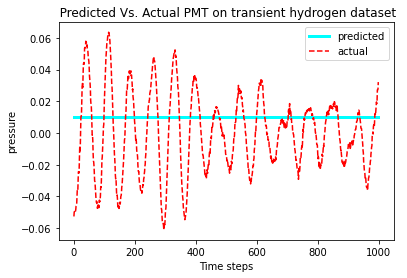

In [21]:
#ploting transient. data for test (one experiment)
num=[i for i in range(1000)]
plt.plot(num, output_transient_test[0][0:1000]+0.01, linewidth=3.0, label='predicted',color='cyan')
plt.plot(num,y_test_trans.iloc[20000:21000,0],linestyle='--',label='actual', color='red')



plt.ylabel('pressure')
#plt.ylim(0,0.3)
#plt.xlabel('Time (0.5 \u03BCs)')
plt.xlabel('Time steps')
#plt.title('  Predicted Vs. Actual RMS DP3 pressure on transient hydrogen dataset ')
plt.title('  Predicted Vs. Actual PMT on transient hydrogen dataset ')
plt.legend()
plt.show()

In [23]:
num=[i for i in range(500)]
plt.plot(num, outputs_test[0][0:500], linewidth=3.0, label='predicted',color='cyan')
plt.plot(num,total_y_data.iloc[230000:230500,0],linestyle='--',label='actual', color='red')



plt.ylabel('pressure')
#plt.ylim(0,0.3)
#plt.xlabel('Time (0.5 \u03BCs)')
plt.xlabel('Time steps')
plt.title('Predicted Vs. Actual RMS DP3 pressure On Test Dataset')
plt.legend()
plt.show()

NameError: name 'outputs_test' is not defined

In [24]:
num=[i for i in range(1000)]
plt.plot(num, outputs[0][0:1000], linewidth=4.0, label='predicted',color='cyan')
plt.plot(num,total_y_data.iloc[11110000:11111000,0],linestyle='--',label='actual', color='red')



plt.ylabel('pressure')
#plt.ylim(0,0.3)
#plt.xlabel('Time (0.5 \u03BCs)')
plt.xlabel('Time steps')
plt.title('Predicted Vs. Actual RMS DP3 pressure')
plt.legend()
plt.show()

NameError: name 'outputs' is not defined

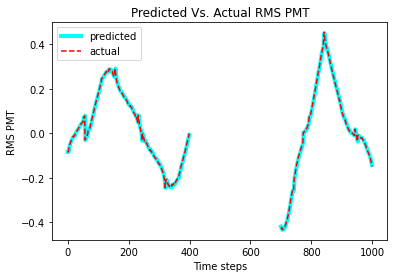

In [20]:
num=[i for i in range(400)]
plt.plot(num, outputs[1][0:400], linewidth=4.0, label='predicted',color='cyan')
plt.plot(num,total_y_data.iloc[11110000:11110400,1],linestyle='--',label='actual', color='red')

num2=[i for i in range(700,1000)]
plt.plot(num2, outputs[1][700:1000], linewidth=4.0,color='cyan')
plt.plot(num2,total_y_data.iloc[11110700:11111000,1],linestyle='--', color='red')

plt.ylabel('RMS PMT')
#plt.ylim(0,0.3)
#plt.xlabel('Time (0.5 \u03BCs)')
plt.xlabel('Time steps')
plt.title('Predicted Vs. Actual RMS PMT')
plt.legend()
plt.show()

In [56]:
Y_data.iloc[0:1000,1]

0     -0.003022
1     -0.013054
2     -0.017345
3     -0.006685
4     -0.000895
         ...   
995    0.014678
996    0.011350
997    0.008113
998    0.009753
999    0.016244
Name: Frequency, Length: 1000, dtype: float64

In [57]:
outputs[1][0:1000]

array([[0.00343918],
       [0.00343918],
       [0.00343918],
       [0.00343918],
       [0.00343918],
       [0.00343918],
       [0.00343918],
       [0.00343918],
       [0.00343918],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343917],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343916],
       [0.00343915],
       [0.00343915],
       [0.00343915],
       [0.003

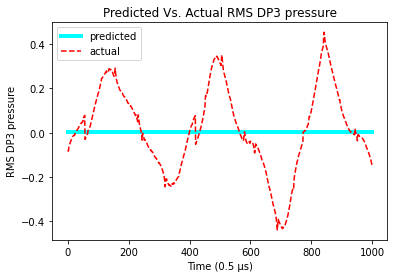

In [69]:
num=[i for i in range(1000)]
plt.plot(num, outputs[1][0:1000], linewidth=4.0, label='predicted',color='cyan')
plt.plot(num,total_y_data.iloc[11110000:11111000,1],linestyle='--',label='actual', color='red')



plt.ylabel('RMS DP3 pressure')
#plt.ylim(0,0.3)
plt.xlabel('Time (0.5 \u03BCs)')
plt.title('Predicted Vs. Actual RMS DP3 pressure')
plt.legend()
plt.show()

In [39]:
outputs[0:10,1]

array([0.00077899, 0.00077896, 0.00077893, 0.00077884, 0.00077884,
       0.00077878, 0.00077872, 0.00077866, 0.0007786 , 0.0007786 ],
      dtype=float32)

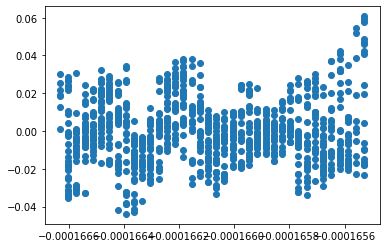

In [57]:
plt.scatter(outputs[100000:101000,1],Y_data.iloc[100000:101000,1])
plt.show()